In [8]:
# -*-coding:utf-8 -*-import matplotlib.pyplot as plt

import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.ticker import AutoMinorLocator 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF , WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


C:\Users\DELL\AppData\Local\Temp/ipykernel_860/2720128055.py:42: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  feos = np.loadtxt('eos.dat',dtype=np.float)
d:\python\lib\site-packages\sklearn\gaussian_process\kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 0.0018. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
No handles with labels found to put in legend.


Text(0.5, 0, '$\\rho_B~[\\rm fm^{-3}]$')

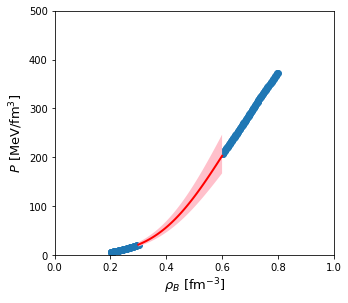

In [9]:
### Construct an axis: ###
plt.figure(figsize=(5,4.5))
ax = plt.subplot(111) 
## The setting of the axes:
#plt.rcParams['xtick.direction']='in' # set ticks' direction
#plt.rcParams['ytick.direction']='in'
#plt.rcParams['xtick.top']=True
#plt.rcParams['ytick.right']=True
#ax.spines['bottom'].set_linewidth(1.5)  
#ax.spines['top'].set_linewidth(1.5)
#ax.spines['left'].set_linewidth(1.5)
#ax.spines['right'].set_linewidth(1.5)
#ax.xaxis.set_minor_locator(AutoMinorLocator(5)) # set the locator of x axis
#ax.yaxis.set_minor_locator(AutoMinorLocator(5))  # set the locator of y axis
#ax.tick_params(length=5,which='major',width=1.5,labelsize=14) # set the length of the majorticks
#ax.tick_params(length=3,which='minor',width=1.5,labelsize=14) # set the length of the minor ticks 

############################## Interpolation with GPR method: #################################
'''  *** feos: the input file. 
               In file "eos.dat", the first column is the baryon number density, 
             the second column is the pressure.  The first half of the data is the 
             EoS of the hadron phase, and the second half is the EoS of quark phase.
             
               You just need to replace the input file, "eos.dat", and reset the
             interpolation interval (xL, xU). Notice that:
              1) You need to put all the training data in one file;
              2) the training set and the testing set shouldn't be too far apart. For example, 
                 if the density of the interpolation starts at 0.3fm^-3，the input baryon density should
                 start from about 0.2 fm^-3 or 0.25 fm^-3 instead of start from 0.001 fm^-3;
              3) When interpolating, the order of magnitude between the input values x and y  shouldn't 
                 differ too much, otherwise, take the logarithm of the input values with large order of magnitude.
   *** Variables:
               x, y: training data (In file 'eos.dat', x is the baryon density; y is the pressure)
                 xL: the lower limit of interpolation region;
                 xU: the upper limit of interpolation region;
                  n: the number of points between xL and xU;
             test_x: the test set (take n points between xL and xU);
             test_y: the output of the variable test_x that need to be predicted;
 (test_yL, test_yU): 95% confidence interval(Pink shade).    '''

# input Data:
feos = np.loadtxt('eos.dat',dtype=np.float)
x, y = feos[:,0], feos[:,1] #input the baryon density and the pressure 
ax.scatter(x, y)
y = np.log10(y)  

# crossover window:
xL, xU, n = 0.3, 0.6, 100 #the interpolated baryon density ranges from 0.3 to 0.6 and 100 points are taken
test_x = np.linspace(xL, xU, n) #the test set
kernel = C(10, (1e-5, 1e4)) * RBF(length_scale = 1)+ WhiteKernel(noise_level=5e-3, noise_level_bounds=(1.8e-3, 3e-3)) #chose the SE kernel
gp = GaussianProcessRegressor (kernel=kernel).fit(x[:, np.newaxis], y) #the GPR method
test_y, y_std = gp.predict(test_x[:, np.newaxis], return_std =True) #predicted pressures and the uncertainties

# 95% confidence interval
y_uncertainty = 1.96*y_std 
test_yL, test_yU=10**(test_y-y_uncertainty), 10**(test_y+y_uncertainty)
test_y=10**(test_y)

###################################### plot: ##########################################
ax.plot(test_x, test_y, c='r', lw=2)
ax.fill_between(test_x, test_yL, test_yU, facecolor='pink')

ax.legend(fontsize=11,loc=2,frameon=False)
ax.set_xlim(0.0, 1.0) 
ax.set_ylim(0, 500)
ax.set_ylabel(r'$P~[\rm MeV/fm^{3}]$',size=13)
ax.set_xlabel(r'$\rho_B~[\rm fm^{-3}]$',size=13) 

